
<b>Question 1: </b>

A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.<br>

Dataset : Cutlets.csv<br>

<b>Assumptions of Hypothesis</b>
Null Hypothesis Ho : μ1 = μ2 (There is no difference in diameters of cutlets between two units).<br>
Alternate Hypothesis Ha : μ1 ≠ μ2 (There is significant difference in diameters of cutlets between two units)<br>
As its problem of 2 samples, 2 sample 2 test approach is applicable
Also, as the number of samples collected from both the units are greater than 30 so, insted of using t-test we need to use z-test to calculate p-value. The reason we are using z-test is that, as no. of samples increases t-distribution approaches to standard normal distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm

In [2]:

# Load Dataset
cutlets_data = pd.read_csv('Cutlets.csv')

In [3]:
cutlets_data.shape

(35, 2)

In [4]:
cutlets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [5]:
cutlets_data.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [6]:
unit_a = cutlets_data['Unit A']
unit_b = cutlets_data['Unit B']

In [7]:
#Applying ztest from statsmodels.stats, weightstats
# This will return two values, 1) ztest vaue, 2)p_value
ztest, pvalue = stests.ztest(x1 = unit_a, x2=unit_b, value=0,alternative='two-sided')

In [8]:
# significance level given is α = 0.05
pvalue = float(pvalue)
α = 0.05

print("P-value: ", pvalue)

if pvalue <= α:
    print("Rejecting null hypothesis")
    print("Conclusion: There is significant difference in diameters of cutlets between two units")
else:
    print("Fail to reject null hypothesis")
    print("Conclusion: There is no significant difference in diameters of cutlets between two units")

P-value:  0.46976045023906077
Fail to reject null hypothesis
Conclusion: There is no significant difference in diameters of cutlets between two units


Result: Fail to reject null hypothesis<br>
Inference: There is no significant difference in diameters of cutlets between two units

<b>Question 2:</b>

A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.<br>

Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.<br>

Dataset : LabTAT.csv<br>

<b>Hypothesis Test: </b>

Anova ftest statistics<br>
Assumptions of Hypothesis<br>
Null Hypothesis Ho : μ1 = μ2 = μ3 = μ4 (All samples Turn Around Time (TAT) population means are same)<br>
Alternate Hypothesis: Atleast one sample Turn Around Time (TAT) population mean is different<br>

In [9]:

# Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [10]:
# Load Dataset
libtat_data = pd.read_csv('LabTAT.csv')

In [11]:
libtat_data.shape

(120, 4)

In [12]:
libtat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [13]:
libtat_data.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [14]:

lab1 = libtat_data['Laboratory 1']
lab2 = libtat_data['Laboratory 2']
lab3 = libtat_data['Laboratory 3']
lab4 = libtat_data['Laboratory 4']

In [15]:
#Applying ANOVA Ftest statistics
import scipy.stats as stats
α = 0.05

f_test, pvalue = stats.f_oneway(lab1, lab2, lab3, lab4)

print("P-value: ", pvalue)

if pvalue <= α:
    print("Rejecting null hypothesis")
    print("Conclusion:  Atleast one sample TAT population mean is different")
else:
    print("Fail to reject null hypothesis")
    print("Conclusion: All samples TAT population means are same")

P-value:  2.1156708949992414e-57
Rejecting null hypothesis
Conclusion:  Atleast one sample TAT population mean is different


Result: Rejecting null hypothesis<br>
Inference: Atleast one sample TAT population mean is different

### Question 3:
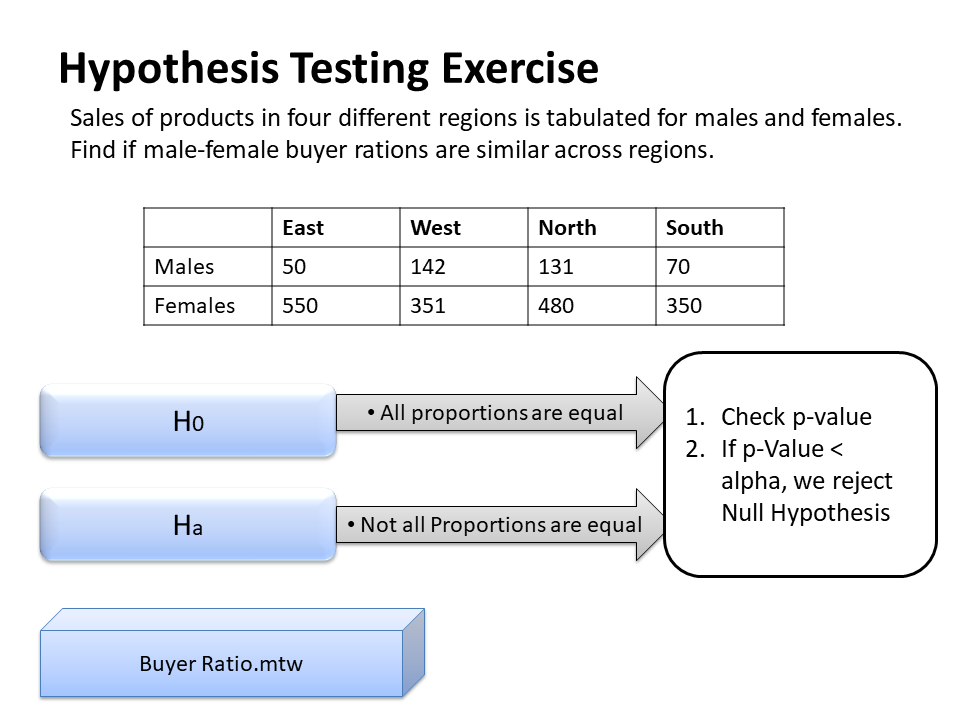

In [16]:
# Loading Libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [17]:
# Load the dataset
buyer_data = pd.read_csv('BuyerRatio.csv')

In [18]:
# Making two dimensional array from available data  
obs=np.array([[50,142,131,70],
              [435,1523,1356,750]])
obs

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]])

In [19]:
#Applying chi2_contigency test
chi2, pvalue, dof, ex = chi2_contingency(obs)

In [20]:
α = 0.05

print(pvalue)

if pvalue <= α:
   print("Rejecting null hypothesis")
   print("Conclusion: Male-Female buyer rations are NOT similar across regions and related")
else:
    print("Fail to reject null hypothesis")
    print("Conclusion: Male-Female buyer rations are similar across regions and not related")

0.6603094907091882
Fail to reject null hypothesis
Conclusion: Male-Female buyer rations are similar across regions and not related


Result: Fail to reject null hypothesis<br>
Inference: Male-Female buyer rations are similar across regions and not related

### Question 4: 

TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain % of the customer order forms. Any error in order form renders it defective and has to be reworked before processing. The manager wants to check whether the defective % varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences<br>

Dataset: CustomerOrderForm.csv<br>

<b>Hypothesis Test: </b>
Chi2 contingency test<br>

Null Hypothesis: Customer order forms defective % does not varies by centre<br>
Alternate Hypothesis: Customer order forms defective % varies by centre<br>

In [21]:

# Loading Libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [22]:

# Load the dataset
cust_data = pd.read_csv('Costomer+OrderForm.csv')

In [23]:
cust_data.shape

(300, 4)

In [24]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [25]:
cust_data.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [26]:
# Getting count of categorical data i.e., Error free and Defective from dataset
error_free_Phillippines, defective_Phillippines = cust_data.Phillippines.value_counts()
error_free_Indonesia, defective_Indonesia = cust_data.Indonesia.value_counts()
error_free_Malta, defective_Malta = cust_data.Malta.value_counts()
error_free_India, defective_India = cust_data.India.value_counts()

In [27]:
# Converting the count of data into 2D array
obs = np.array([[error_free_Phillippines, error_free_Indonesia, error_free_Malta, error_free_India],
               [defective_Phillippines, defective_Indonesia, defective_Malta, defective_India]])
obs

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

In [28]:
#Applying chi2_contigency test
chi2, pvalue, dof, ex = chi2_contingency(obs)

In [29]:

α = 0.05


if pvalue <= α:
   print("Rejecting null hypothesis")
   print("Conclusion: Customer order forms defective %  varies by centre")
else:
    print("Fail to reject null hypothesis")
    print("Conclusion: Customer order forms defective %  does not varies by centre")

Fail to reject null hypothesis
Conclusion: Customer order forms defective %  does not varies by centre


Result: Fail to reject null hypothesis<br>
Inference: Customer order forms defective % does not varies by centre